In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df_events_v2 = pd.read_csv("alarms.csv", sep = ";")
df_events_v2["start_time"] = pd.to_datetime(df_events_v2["start"])
df_events_v2["end_time"] = pd.to_datetime(df_events_v2["end"])

df_events_v2['duration(HOURS)'] = (df_events_v2['end_time'] - df_events_v2['start_time']).dt.total_seconds() / 3600

In [39]:
df_events_v2.head(10)

,id,region_id,region_title,region_city,all_region,start,end,clean_end,intersection_alarm_id,start_time,end_time,duration(HOURS)
0,2,3,Вінниччина,Вінниця,0,2022-02-25 22:55:42,2022-02-25 23:41:53,2022-02-25 23:41:53,NaN,2022-02-25 22:55:42,2022-02-25 23:41:53,0.769722
1,4,12,Львівщина,Львів,0,2022-02-26 06:26:17,2022-02-26 07:15:28,2022-02-26 07:15:28,NaN,2022-02-26 06:26:17,2022-02-26 07:15:28,0.819722
2,5,14,Одещина,Одеса,0,2022-02-26 07:16:58,2022-02-26 07:47:03,2022-02-26 07:47:03,NaN,2022-02-26 07:16:58,2022-02-26 07:47:03,0.501389
3,6,6,Житомирщина,Житомир,0,2022-02-26 08:05:54,2022-02-26 09:36:36,2022-02-26 09:36:36,NaN,2022-02-26 08:05:54,2022-02-26 09:36:36,1.511667
4,7,3,Вінниччина,Вінниця,0,2022-02-26 08:39:39,2022-02-26 10:42:41,2022-02-26 10:42:41,NaN,2022-02-26 08:39:39,2022-02-26 10:42:41,2.050556
5,9,3,Вінниччина,Вінниця,0,2022-02-26 10:58:23,2022-02-26 11:59:40,2022-02-26 11:59:40,NaN,2022-02-26 10:58:23,2022-02-26 11:59:40,1.021389
6,10,12,Львівщина,Львів,0,2022-02-26 13:44:44,2022-02-26 14:27:25,2022-02-26 14:27:25,NaN,2022-02-26 13:44:44,2022-02-26 14:27:25,0.711389
7,3,16,Рівненщина,Рівненська обл.,1,2022-02-26 15:54:53,2022-02-26 16:14:46,2022-02-26 16:14:46,NaN,2022-02-26 15:54:53,2022-02-26 16:14:46,0.331389
8,1,2,Волинь,Волинська обл.,1,2022-02-26 16:08:26,2022-02-26 16:39:26,2022-02-26 16:39:26,NaN,2022-02-26 16:08:26,2022-02-26 16:39:26,0.516667
9,11,21,Хмельниччина,Деражня,0,2022-02-26 16:10:29,2022-02-26 17:19:57,2022-02-26 17:19:57,NaN,2022-02-26 16:10:29,2022-02-26 17:19:57,1.157778


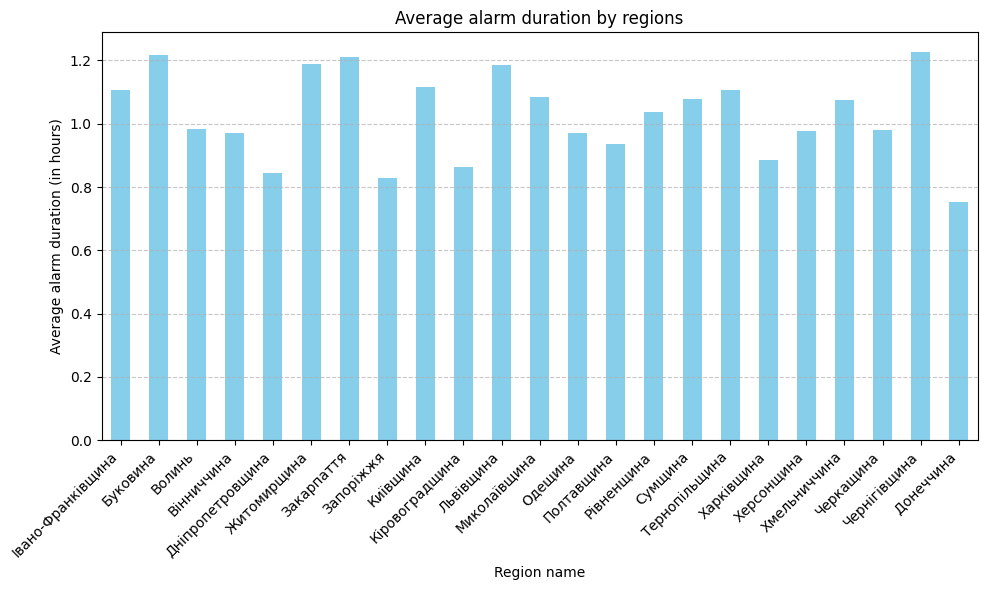

In [40]:
avg_duration_by_region = df_events_v2.groupby('region_title')['duration(HOURS)'].mean()


plt.figure(figsize=(10, 6))
avg_duration_by_region.plot(kind='bar', color='skyblue')
plt.title('Average alarm duration by regions')
plt.xlabel('Region name')
plt.ylabel('Average alarm duration (in hours)')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
df_events_v2['year_month'] = df_events_v2['start_time'].dt.to_period('M')
avg_duration_by_month = df_events_v2.groupby('year_month')['duration(HOURS)'].mean().reset_index()
avg_duration_by_month['year_month'] = avg_duration_by_month['year_month'].astype(str)

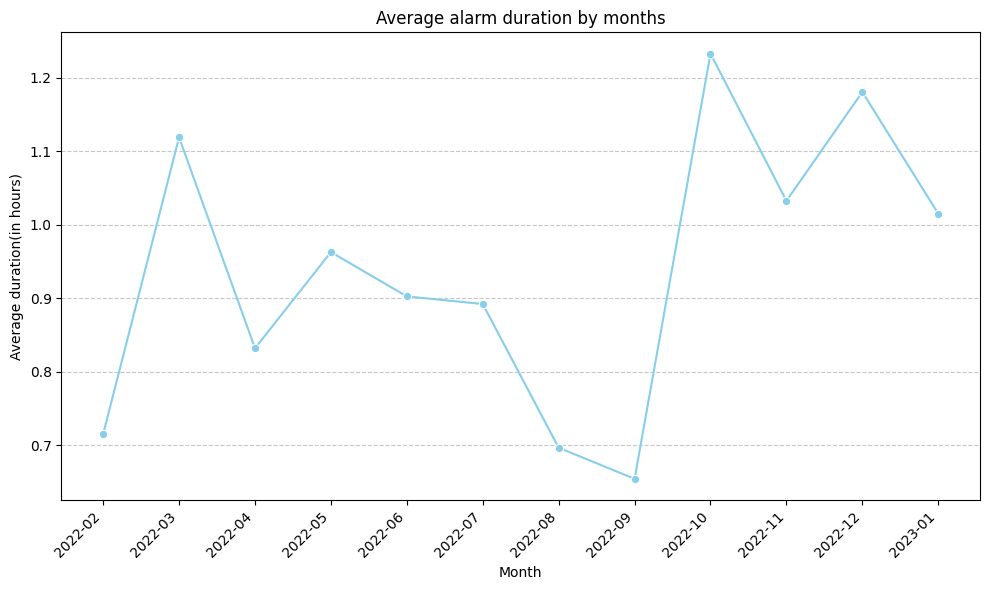

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='duration(HOURS)', data=avg_duration_by_month, marker='o', color='skyblue')
plt.title('Average alarm duration by months')
plt.xlabel('Month')
plt.ylabel('Average duration(in hours)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
grouped_data = df_events_v2.groupby(['region_title', 'year_month'])['duration(HOURS)'].mean().reset_index()
grouped_data['year_month'] = grouped_data['year_month'].dt.strftime('%Y-%m')

df_events_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19933 entries, 0 to 19932
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     19933 non-null  int64         
 1   region_id              19933 non-null  int64         
 2   region_title           19933 non-null  object        
 3   region_city            19933 non-null  object        
 4   all_region             19933 non-null  int64         
 5   start                  19933 non-null  object        
 6   end                    19933 non-null  object        
 7   clean_end              19932 non-null  object        
 8   intersection_alarm_id  2098 non-null   float64       
 9   start_time             19933 non-null  datetime64[ns]
 10  end_time               19933 non-null  datetime64[ns]
 11  duration(HOURS)        19933 non-null  float64       
 12  year_month             19933 non-null  period[M]     
dtypes

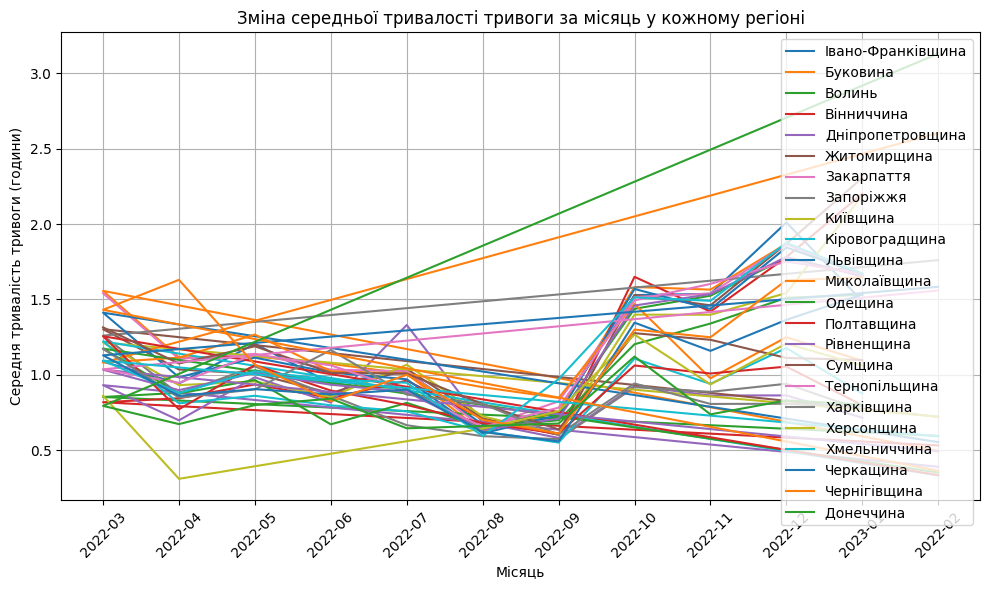

In [55]:
plt.figure(figsize=(10, 6))
for region in grouped_data['region_title'].unique():
    region_data = grouped_data[grouped_data['region_title'] == region]
    plt.plot(region_data['year_month'], region_data['duration(HOURS)'], label=region)

plt.xlabel('Місяць')
plt.ylabel('Середня тривалість тривоги (години)')
plt.title('Зміна середньої тривалості тривоги за місяць у кожному регіоні')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()